In [1]:
import sys
sys.path.append('../../Share')
import config
import baseline
import Target

import numpy as np
import pandas as pd

In [2]:
baseline_K_val = [1, 4, 7, 10, 13, 16, 19]
SUBJECT = "Xianyu"

if __name__ == "__main__":
    for K in baseline_K_val:
        trainer = baseline.ModelTrainer(config, subject=f"{SUBJECT}")
        trainer.run_all_sessions_training_K_data(K)
        df = trainer.save_results(f'../../Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_X.csv')

# 저장해놨어서 데이터 업데이트 전에 한번 돌리면 굳이 안돌려도 됨'''

Dataset 1/22 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
(8521, 4, 14, 1) (8521,) (86, 4, 14, 1) (86,)
Dataset 2/22 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
second (8521, 4, 14, 1) (8521,) (86, 4, 14, 1) (86,)
Start Training (total epochs: 50)...
Finish Training! (Model is saved)
Maximum training accuracy : 89.94%
Maximum validation accuracy : 95.35%
Accuracy of test dataset using model V0: 95.3488%
Dataset 3/22 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 78.7429%
Dataset 4/22 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 49.6840%
Dataset 5/22 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Accuracy on unseen dataset: 75.1835%
Dataset 6/22 - Session Exp_2025-06-27-v2/E9AD0E7DCC2B/
Accuracy on unseen dataset: 71.8161%
Dataset 7/22 - Session Exp_2025-06-30-v1/FEFFF6FFF5FF/
Accuracy on unseen dataset: 87.6523%
Dataset 8/22 - Session Exp_2025-06-30-v2/FEFFF6FFF5FF/
Accuracy on unseen dataset: 55.6840%
Dataset 9/22 - Session Exp_2025-07-01-v1/E9AD0

In [3]:
b_path = 'C:/Users/hml76/PycharmProjects/MindForce/'
baseline_K = ['1', '4', '7', '10', '13', '16', '19']
baselines = []

for idx, K in enumerate(baseline_K):
    baselines.append(b_path + f'/github/Results/Results_{SUBJECT}/Baseline_results_train_with_{K}data_X.csv')

In [4]:
prog_trainer = Target.ProgressiveTrainer(config, subject=SUBJECT)
Init_acc_all, Prev_acc_all, Trained_acc_all = prog_trainer.run(plot_learning_curve=False)
pd.DataFrame(Trained_acc_all).to_csv(f'../../Results/Results_{SUBJECT}/Train_Test_per_sessions.csv', index=False)


Dataset 1/22 - Session Exp_2025-06-24-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 84.04%
Maximum validation accuracy : 83.85%

Dataset 2/22 - Session Exp_2025-06-24-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 78.59%
Maximum validation accuracy : 80.11%

Dataset 3/22 - Session Exp_2025-06-26-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 85.03%
Maximum validation accuracy : 86.5%

Dataset 4/22 - Session Exp_2025-06-26-v2/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 72.54%
Maximum validation accuracy : 77.46%

Dataset 5/22 - Session Exp_2025-06-27-v1/E9AD0E7DCC2B/
Start Training (total epochs: 50)...
Finish Training! (Model is NOT saved)

Maximum training accuracy : 90.56%
Maximum validation

In [5]:
for idx, x in enumerate([Init_acc_all, Prev_acc_all, Trained_acc_all]):
    if idx==0:
        print(f"Average of acc without training anything (should be random): {np.mean(x)*100:.2f}%")
    elif idx==1:
        print(f"Average of acc using previous test data after training: {np.mean(x)*100:.2f}%")
    elif idx==2:
        print(f"Average of acc using current test data after training: {np.mean(x)*100:.2f}%")
for idx, b in enumerate(baselines):
    val = float(np.mean(pd.read_csv(baselines[idx])['Accuracy'][int(baseline_K[idx]):]))
    print(f"K-{baseline_K[idx]}: {val:.2f}% | Target: {np.mean(Trained_acc_all[int(baseline_K[idx]):])*100:.2f}")

Average of acc without training anything (should be random): 6.99%
Average of acc using previous test data after training: 71.15%
Average of acc using current test data after training: 83.62%
K-1: 76.60% | Target: 83.61
K-4: 75.96% | Target: 83.99
K-7: 78.81% | Target: 84.08
K-10: 79.12% | Target: 84.02
K-13: 81.55% | Target: 85.97
K-16: 77.51% | Target: 85.60
K-19: 76.77% | Target: 85.87


In [6]:
Trained_acc_all

[0.8384847640991211,
 0.8010892868041992,
 0.8650190234184265,
 0.7745786309242249,
 0.9135399460792542,
 0.7464585900306702,
 0.8468322157859802,
 0.8349056839942932,
 0.8431054353713989,
 0.8510539531707764,
 0.7203617691993713,
 0.7263888716697693,
 0.8986313939094543,
 0.8783940672874451,
 0.8622768521308899,
 0.8599393963813782,
 0.8451911807060242,
 0.8498142957687378,
 0.8651216626167297,
 0.8395375609397888,
 0.8694038391113281,
 0.8671929240226746]

In [11]:
np.array(baseline_result['Info'])

array(['Stand (6/24)', 'Sit_chair (6/24)', 'Stand (6/26)',
       'Sit_chair (6/26)', 'Stand (6/27)', 'Sit_chair (6/27)',
       'Stand (6/30)', 'Sit_chair (6/30)', 'Stand (7/1)',
       'Sit_chair (7/1)', 'Stand (7/2)', 'Sit_chair (7/2)', 'Stand (7/9)',
       'Sit_chair (7/9)', 'Stand (7/11)', 'Sit_chair (7/11)',
       'Stand (7/23)', 'Sit_chair (7/23)'], dtype=object)

In [12]:
baselines

['C:/Users/hml76/PycharmProjects/MindForce//github/Results/Results_Xianyu/Baseline_results_train_with_1data_X.csv',
 'C:/Users/hml76/PycharmProjects/MindForce//github/Results/Results_Xianyu/Baseline_results_train_with_4data_X.csv',
 'C:/Users/hml76/PycharmProjects/MindForce//github/Results/Results_Xianyu/Baseline_results_train_with_7data_X.csv',
 'C:/Users/hml76/PycharmProjects/MindForce//github/Results/Results_Xianyu/Baseline_results_train_with_10data_X.csv',
 'C:/Users/hml76/PycharmProjects/MindForce//github/Results/Results_Xianyu/Baseline_results_train_with_13data_X.csv',
 'C:/Users/hml76/PycharmProjects/MindForce//github/Results/Results_Xianyu/Baseline_results_train_with_16data_X.csv',
 'C:/Users/hml76/PycharmProjects/MindForce//github/Results/Results_Xianyu/Baseline_results_train_with_19data_X.csv']

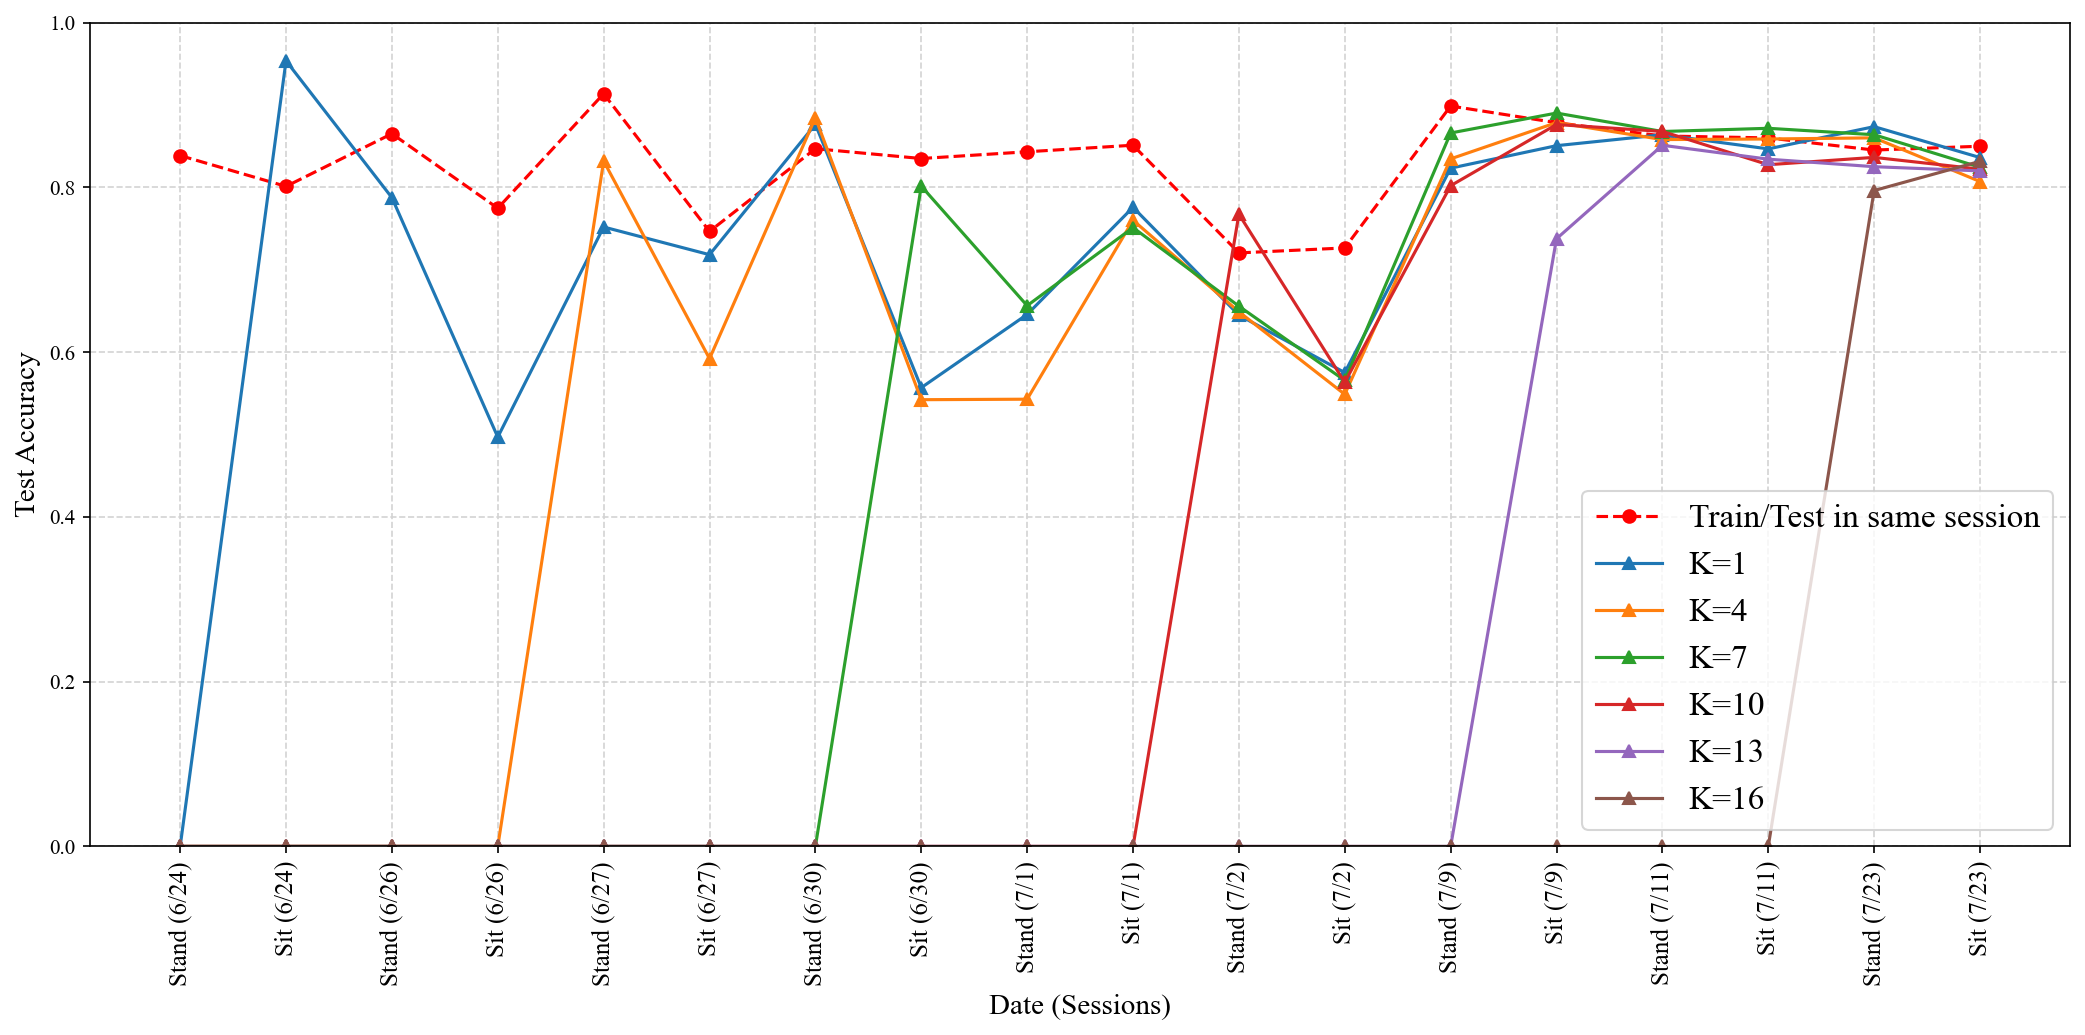

In [13]:
import matplotlib.pyplot as plt

Trained_acc_all_stored = [0.8384847640991211, 0.8010892868041992, 0.8650190234184265, 0.7745786309242249, 0.9135399460792542, 0.7464585900306702, 0.8468322157859802, 0.8349056839942932, 0.8431054353713989, 0.8510539531707764, 0.7203617691993713, 0.7263888716697693, 0.8986313939094543, 0.8783940672874451,
 0.8622768521308899, 0.8599393963813782, 0.8451911807060242, 0.8498142957687378, 0.8651216626167297, 0.8395375609397888, 0.8694038391113281, 0.8671929240226746]

X_labels = ['Stand (6/24)', 'Sit (6/24)', 'Stand (6/26)', 'Sit (6/26)', 'Stand (6/27)', 'Sit (6/27)',
       'Stand (6/30)', 'Sit (6/30)', 'Stand (7/1)', 'Sit (7/1)', 'Stand (7/2)', 'Sit (7/2)', 'Stand (7/9)',
       'Sit (7/9)', 'Stand (7/11)', 'Sit (7/11)', 'Stand (7/23)', 'Sit (7/23)', 'Stand (8/12)', 'Sit (8/12)', 'Stand (8/13)', 'Sit (8/13)']

plt.rcParams['font.family'] = 'Times New Roman'

plt.figure(figsize=(14, 7), dpi=150)
#plt.title('Training from scratch every time', fontsize=15)
plt.plot(Trained_acc_all_stored[:-4], c='red', label='Train/Test in same session', marker='o', linestyle='--')
for idx, base in enumerate(baselines[:-1]):
    baseline_result = pd.read_csv(base)
    plt.plot(X_labels[:-4], baseline_result['Accuracy'][:-4] / 100, marker='^', label=f'K={baseline_K[idx]}', linestyle='-')

plt.ylim([0, 1])
plt.xlabel('Date (Sessions)', fontsize=14)
plt.ylabel('Test Accuracy', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.legend(fontsize=16, ncol=1)
plt.grid(True, linestyle='--', color='lightgrey')
plt.tight_layout()
plt.show()